In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# act_train_url = 'https://drive.google.com/file/d/1hKYShRB7AeVtTo6xXjqKTx435M36wG4I/view?usp=sharing'
# people_url = 'https://drive.google.com/file/d/1mcubwphNke8B5tAF23r-AX747Y0-O19C/view?usp=sharing'
# act_test_url = 'https://drive.google.com/file/d/1iGMR_Be6FO-zDYKr-b8gQ--9bdGjOVRU/view?usp=sharing'

act_train_path = '/content/drive/MyDrive/B.Tech/prediction/act_train.csv'
people_path = '/content/drive/MyDrive/B.Tech/prediction/people.csv'
act_test_path = '/content/drive/MyDrive/B.Tech/prediction/act_test.csv'

In [ ]:
df_train = pd.read_csv(act_train_path)
df_people = pd.read_csv(people_path)
df_test = pd.read_csv(act_test_path)

In [ ]:
print(df_train.shape)
df_train.head(10)

(2197291, 15)


,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
5,ppl_100,act2_898576,2023-08-04,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1727,0
6,ppl_100002,act2_1233489,2022-11-23,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
7,ppl_100002,act2_1623405,2022-11-23,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
8,ppl_100003,act2_1111598,2023-02-07,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
9,ppl_100003,act2_1177453,2023-06-28,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1


In [ ]:
print(df_people.shape)
df_people.head()

(189118, 41)


,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


In [ ]:
print(df_test.shape)
df_test.head()

(498687, 14)


,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


In [ ]:
print(df_train.shape)
df_train.isnull().sum()

(2197291, 15)


people_id                  0
activity_id                0
date                       0
activity_category          0
char_1               2039676
char_2               2039676
char_3               2039676
char_4               2039676
char_5               2039676
char_6               2039676
char_7               2039676
char_8               2039676
char_9               2039676
char_10               157615
outcome                    0
dtype: int64

In [ ]:
df_null = pd.DataFrame(df_train.isnull().sum(), columns=['Null count'])
df_null['Null %'] = (df_null['Null count']/df_train.shape[0])*100
df_null

,Null count,Null %
people_id,0,0.000000
activity_id,0,0.000000
date,0,0.000000
activity_category,0,0.000000
char_1,2039676,92.826849
char_2,2039676,92.826849
char_3,2039676,92.826849
char_4,2039676,92.826849
char_5,2039676,92.826849
char_6,2039676,92.826849


In [ ]:
for i in df_train.columns:
    df_train[i].fillna(value=0, inplace=True)
df_train

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,0,0,0,0,0,0,0,0,0,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,0,0,0,0,0,0,0,0,0,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,0,0,0,0,0,0,0,0,0,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,0,0,0,0,0,0,0,0,0,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,0,0,0,0,0,0,0,0,0,type 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,type 4,0,0,0,0,0,0,0,0,0,type 418,1
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,0,0,0,0,0,0,0,0,0,type 1832,1
2197288,ppl_99994,act2_536973,2023-01-19,type 2,0,0,0,0,0,0,0,0,0,type 1,1
2197289,ppl_99994,act2_688656,2023-05-02,type 4,0,0,0,0,0,0,0,0,0,type 199,1


In [ ]:
print(df_test.shape)
print(df_test.groupby('char_1')['char_1'].agg('count').sum())
# print(df_test.isnull().sum())
df_test_null = pd.DataFrame(df_test.isnull().sum(), columns=['Null count'])
df_test_null['Null %'] = (df_test_null['Null count']/df_test.shape[0])*100
df_test_null

(498687, 14)
40092


,Null count,Null %
people_id,0,0.000000
activity_id,0,0.000000
date,0,0.000000
activity_category,0,0.000000
char_1,458595,91.960488
char_2,458595,91.960488
char_3,458595,91.960488
char_4,458595,91.960488
char_5,458595,91.960488
char_6,458595,91.960488


In [ ]:
import numpy as np

In [ ]:
for i in df_train['char_1']:
    if i != 0:
        print(type(i))
        break

<class 'str'>


In [ ]:
def convert_str_to_num(x):
    if x != 0:
        t = x.split(' ')
        return int(t[1])
    else:
        return x

In [ ]:
act_char = ['char_1','char_2','char_3','char_4','char_5','char_6','char_7','char_8','char_9','char_10']
for i in act_char:
    df_train[i] = df_train[i].apply(convert_str_to_num)
df_train

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,0,0,0,0,0,0,0,0,0,76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,0,0,0,0,0,0,0,0,0,1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,0,0,0,0,0,0,0,0,0,1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,0,0,0,0,0,0,0,0,0,1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,type 4,0,0,0,0,0,0,0,0,0,418,1
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,0,0,0,0,0,0,0,0,0,1832,1
2197288,ppl_99994,act2_536973,2023-01-19,type 2,0,0,0,0,0,0,0,0,0,1,1
2197289,ppl_99994,act2_688656,2023-05-02,type 4,0,0,0,0,0,0,0,0,0,199,1


In [ ]:
df_train.groupby('char_1')['char_1'].agg('count')

char_1
0     2039676
1       14938
2       38030
3       12372
4        1329
5       34509
6        2385
7        7312
8        2110
9        1225
10       7795
11       2333
12      14917
13       1586
14        990
15       1284
16       1229
17       1778
18         57
19        491
20        434
21          5
22        211
23       2420
24        641
25        694
26       2220
27        199
28        706
29       1233
30        653
31         54
32        146
33         60
34         66
35        180
36        397
37         10
38         12
39         63
40        214
41        278
42          4
43         11
44          8
45          1
46          6
47          2
48          3
49          6
50          5
52          3
Name: char_1, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
print(df_train.shape)
df_train.isnull().sum()

(2197291, 15)


people_id            0
activity_id          0
date                 0
activity_category    0
char_1               0
char_2               0
char_3               0
char_4               0
char_5               0
char_6               0
char_7               0
char_8               0
char_9               0
char_10              0
outcome              0
dtype: int64

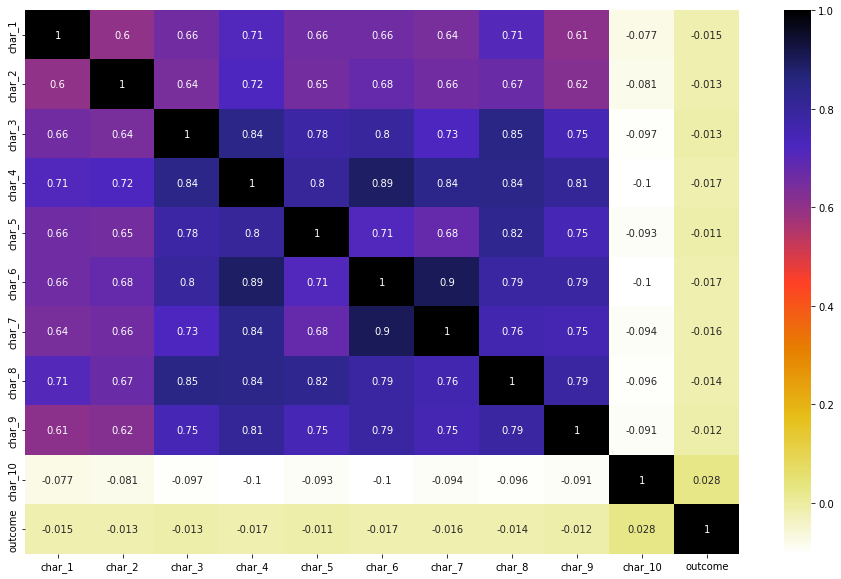

In [ ]:
plt.figure(figsize=(16,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [ ]:
df_train.describe()

,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
count,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06
mean,4.972751e-01,3.721710e-01,2.820587e-01,2.007781e-01,2.567903e-01,1.442121e-01,1.832220e-01,3.784223e-01,5.165215e-01,4.676969e+02,4.439544e-01
std,2.576469e+00,1.850443e+00,1.166786e+00,7.760891e-01,1.104695e+00,5.628843e-01,7.826314e-01,1.585741e+00,2.280433e+00,1.165594e+03,4.968491e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.200000e+02,1.000000e+00
max,5.200000e+01,3.200000e+01,1.100000e+01,7.000000e+00,7.000000e+00,5.000000e+00,8.000000e+00,1.800000e+01,1.900000e+01,9.251000e+03,1.000000e+00


In [ ]:
df_train1 = df_train.drop(['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6',
                           'char_7', 'char_8', 'char_9'], axis = 1)
df_train1

,people_id,activity_id,date,activity_category,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,1,0
...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,type 4,418,1
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,1832,1
2197288,ppl_99994,act2_536973,2023-01-19,type 2,1,1
2197289,ppl_99994,act2_688656,2023-05-02,type 4,199,1


In [ ]:
df_train1.rename(columns = {"char_10": "activity_char"}, inplace = True)
df_train1

,people_id,activity_id,date,activity_category,activity_char,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,1,0
...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,type 4,418,1
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,1832,1
2197288,ppl_99994,act2_536973,2023-01-19,type 2,1,1
2197289,ppl_99994,act2_688656,2023-05-02,type 4,199,1


In [ ]:
df_train2 = pd.merge(df_train1, df_people, how = 'left', on = ['people_id'])
df_train2

,people_id,activity_id,date_x,activity_category,activity_char,outcome,char_1,group_1,char_2,date_y,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,76,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,type 4,418,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,1832,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95
2197288,ppl_99994,act2_536973,2023-01-19,type 2,1,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95
2197289,ppl_99994,act2_688656,2023-05-02,type 4,199,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95


In [ ]:
from datetime import datetime

In [ ]:
df_train2['date_x'] = pd.to_datetime(df_train2['date_x'])
df_train2['date_y'] = pd.to_datetime(df_train2['date_y'])

print(type(df_train2['date_x'][0]))
print(type(df_train2['date_y'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# def give_days(x):
#     return x.days

df_train2['days_difference'] = (df_train2['date_x'] - df_train2['date_y']).apply(lambda x: x.days)
df_train2

,people_id,activity_id,date_x,activity_category,activity_char,outcome,char_1,group_1,char_2,date_y,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference
0,ppl_100,act2_1734928,2023-08-26,type 4,76,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,788
1,ppl_100,act2_2434093,2022-09-27,type 2,1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,455
2,ppl_100,act2_3404049,2022-09-27,type 2,1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,455
3,ppl_100,act2_3651215,2023-08-04,type 2,1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,766
4,ppl_100,act2_4109017,2023-08-26,type 2,1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,type 4,418,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95,161
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,1832,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95,83
2197288,ppl_99994,act2_536973,2023-01-19,type 2,1,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95,13
2197289,ppl_99994,act2_688656,2023-05-02,type 4,199,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,95,116


In [ ]:
type(df_train2['days_difference'][0])

numpy.int64

In [ ]:
df_train2.dtypes

people_id                    object
activity_id                  object
date_x               datetime64[ns]
activity_category            object
activity_char                 int64
outcome                       int64
char_1                       object
group_1                      object
char_2                       object
date_y               datetime64[ns]
char_3                       object
char_4                       object
char_5                       object
char_6                       object
char_7                       object
char_8                       object
char_9                       object
char_10                        bool
char_11                        bool
char_12                        bool
char_13                        bool
char_14                        bool
char_15                        bool
char_16                        bool
char_17                        bool
char_18                        bool
char_19                        bool
char_20                     

In [ ]:
df_train2.any(bool_only = True)

char_10    True
char_11    True
char_12    True
char_13    True
char_14    True
char_15    True
char_16    True
char_17    True
char_18    True
char_19    True
char_20    True
char_21    True
char_22    True
char_23    True
char_24    True
char_25    True
char_26    True
char_27    True
char_28    True
char_29    True
char_30    True
char_31    True
char_32    True
char_33    True
char_34    True
char_35    True
char_36    True
char_37    True
dtype: bool

In [ ]:
df_train3 = df_train2.copy()
for i in df_train3.any(bool_only = True).index:
    df_train3[i] = df_train3[i].astype(int)
df_train3

,people_id,activity_id,date_x,activity_category,activity_char,outcome,char_1,group_1,char_2,date_y,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference
0,ppl_100,act2_1734928,2023-08-26,type 4,76,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
1,ppl_100,act2_2434093,2022-09-27,type 2,1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
2,ppl_100,act2_3404049,2022-09-27,type 2,1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
3,ppl_100,act2_3651215,2023-08-04,type 2,1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,766
4,ppl_100,act2_4109017,2023-08-26,type 2,1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,2023-06-16,type 4,418,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,161
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,1832,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,83
2197288,ppl_99994,act2_536973,2023-01-19,type 2,1,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,13
2197289,ppl_99994,act2_688656,2023-05-02,type 4,199,1,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,116


In [ ]:
df_train4 = df_train3.drop(['date_x', 'date_y'], axis = 1)
df_train4

,people_id,activity_id,activity_category,activity_char,outcome,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference
0,ppl_100,act2_1734928,type 4,76,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
1,ppl_100,act2_2434093,type 2,1,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
2,ppl_100,act2_3404049,type 2,1,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
3,ppl_100,act2_3651215,type 2,1,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,766
4,ppl_100,act2_4109017,type 2,1,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,type 4,418,1,type 2,group 17764,type 3,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,161
2197287,ppl_99994,act2_4743548,type 4,1832,1,type 2,group 17764,type 3,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,83
2197288,ppl_99994,act2_536973,type 2,1,1,type 2,group 17764,type 3,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,13
2197289,ppl_99994,act2_688656,type 4,199,1,type 2,group 17764,type 3,type 2,type 7,type 2,type 1,type 2,type 2,type 2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,116


In [ ]:
chars = ['char_1','char_2','char_3','char_4','char_5','char_6','char_7','char_8','char_9', 'group_1', 'activity_category']
for i in chars:
    df_train4[i] = df_train4[i].apply(convert_str_to_num)
df_train4

,people_id,activity_id,activity_category,activity_char,outcome,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference
0,ppl_100,act2_1734928,4,76,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
1,ppl_100,act2_2434093,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
2,ppl_100,act2_3404049,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
3,ppl_100,act2_3651215,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,766
4,ppl_100,act2_4109017,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,ppl_99994,act2_4668076,4,418,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,161
2197287,ppl_99994,act2_4743548,4,1832,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,83
2197288,ppl_99994,act2_536973,2,1,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,13
2197289,ppl_99994,act2_688656,4,199,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,116


In [ ]:
def convert_str_to_num_(x):
    t = x.split('_')
    return int(float(t[1]))

ids = ['people_id', 'activity_id']
for i in ids:
    df_train4[i] = df_train4[i].apply(convert_str_to_num_)
df_train4

,people_id,activity_id,activity_category,activity_char,outcome,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,days_difference
0,100,1734928,4,76,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
1,100,2434093,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
2,100,3404049,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,455
3,100,3651215,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,766
4,100,4109017,2,1,0,2,17304,2,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,99994,4668076,4,418,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,161
2197287,99994,4743548,4,1832,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,83
2197288,99994,536973,2,1,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,13
2197289,99994,688656,4,199,1,2,17764,3,2,7,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,116


In [ ]:
df_train4.dtypes

people_id            int64
activity_id          int64
activity_category    int64
activity_char        int64
outcome              int64
char_1               int64
group_1              int64
char_2               int64
char_3               int64
char_4               int64
char_5               int64
char_6               int64
char_7               int64
char_8               int64
char_9               int64
char_10              int64
char_11              int64
char_12              int64
char_13              int64
char_14              int64
char_15              int64
char_16              int64
char_17              int64
char_18              int64
char_19              int64
char_20              int64
char_21              int64
char_22              int64
char_23              int64
char_24              int64
char_25              int64
char_26              int64
char_27              int64
char_28              int64
char_29              int64
char_30              int64
char_31              int64
c

In [ ]:
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x = df_train4.drop('outcome', axis=1)
y = df_train4.outcome

In [ ]:
x1 = x[:100000]
y1 = y[:100000]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
def auc_predict(x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr,tpr)
    return auc

In [ ]:
auc_predict(x_test, y_test)

0.9930523757485629

In [ ]:
model.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
import joblib

joblib.dump(model, "/content/drive/MyDrive/B.Tech/prediction/saved_model.joblib")

['/content/drive/MyDrive/B.Tech/prediction/saved_model.joblib']